## 图像平滑（图像模糊）

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def show(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def imread(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

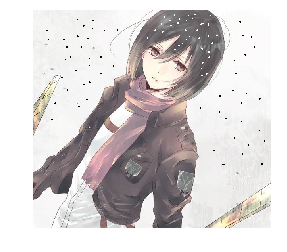

In [2]:
image = imread('./image/image2.jpg')
show(image)

### 1、Averaging平均：计算卷积框内所有像素的平均值

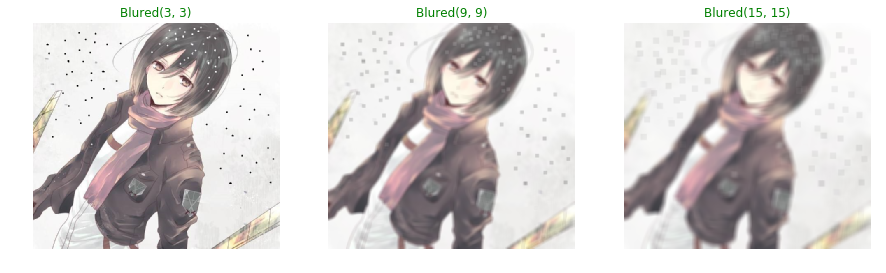

In [3]:
kernelsize = [(3,3),(9,9),(15,15)]
plt.figure(figsize=(15,15))
for i,kernel in enumerate(kernelsize):    # enumerate为循环的计数器，第一次i为0，第二次为1
    plt.subplot(1,3,i+1)
    # 平均平滑
    blur = cv2.blur(image, kernel)
    plt.axis('off')
    plt.title('Blured' + str(kernel), color='green')
    plt.imshow(blur)
plt.show()

可以看出，卷积核越大，Averaging平滑得到的图像就越模糊。

### 2、Gaussian高斯模糊
把卷积核换成了高斯核，框大小不变，里面的值服从高斯分布，从原来的求平均数变味了现在的求加权平均数。

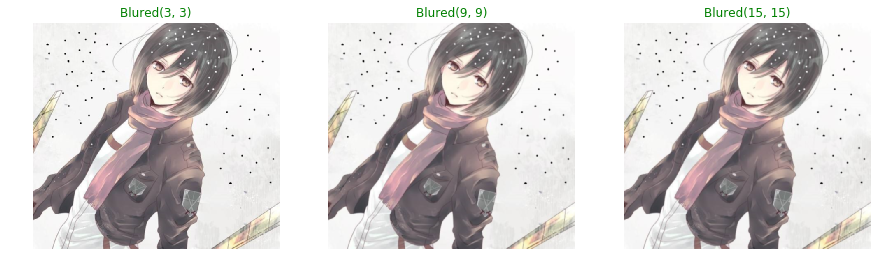

In [4]:
kernelsize = [(3,3),(9,9),(15,15)]
plt.figure(figsize=(15,15))
for i,kernel in enumerate(kernelsize):
    plt.subplot(1,3,i+1)
    blur = cv2.GaussianBlur(image, kernel,1)    # Gaussian需要输入高斯分布的标准差
    plt.axis('off')
#     print(kernel)
    plt.title('Blured' + str(kernel), color='green')
    plt.imshow(blur)
plt.show()

### 3、Median中值模糊
用卷积框对应像素的中值来代替中心像素的中值。

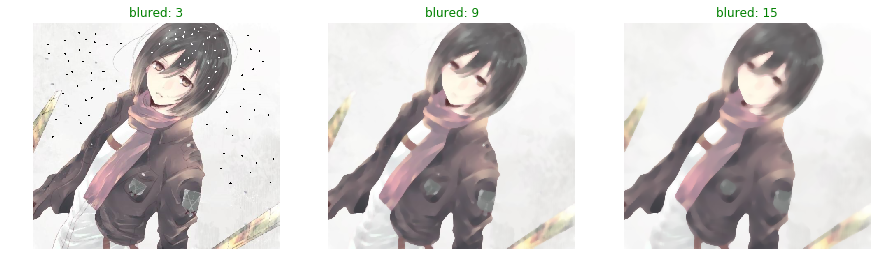

In [5]:
kernelsize = [3,9,15]
plt.figure(figsize=(15,15))
for i,kernel in enumerate(kernelsize):
    plt.subplot(1,3,i+1)
    blur = cv2.medianBlur(image, kernel)
    plt.title('blured: '+str(kernel), color='green')
    plt.axis('off')
    plt.imshow(blur)
plt.show()

### 4、Bilateral双边过滤
能在保持边界清晰的情况下有效地去除噪音。

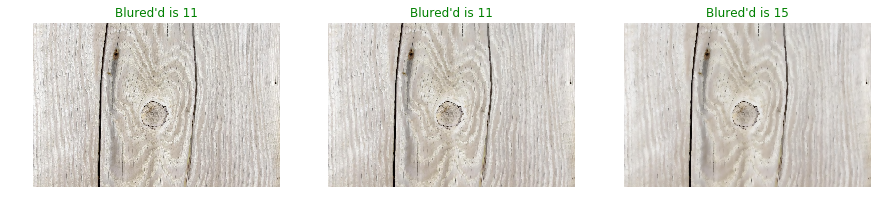

In [6]:
image = imread('./image/wood.jpg')
params = [(11,21,7),(11,41,21),(15,75,75)]
plt.figure(figsize=(15,15))
for i,(d,sigmacolor,sigmaspace) in enumerate(params):
    plt.subplot(1,3,i+1)
    blur = cv2.bilateralFilter(image, d, sigmacolor, sigmaspace)
    ## 其中d表示作用的范围半径
    plt.axis('off')
    plt.title("Blured'd is "+str(d), color='green')
    plt.imshow(blur)
plt.show()